In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('german.csv', sep = ';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [26]:
data.nunique()

Creditability                          2
Account_Balance                        4
Duration_of_Credit_monthly            33
Payment_Status_of_Previous_Credit      5
Purpose                               10
Credit_Amount                        923
Value_Savings_Stocks                   5
Length_of_current_employment           5
Instalment_per_cent                    4
Sex_Marital_Status                     4
Guarantors                             3
Duration_in_Current_address            4
Most_valuable_available_asset          4
Age_years                             53
Concurrent_Credits                     3
Type_of_apartment                      3
No_of_Credits_at_this_Bank             4
Occupation                             4
No_of_dependents                       2
Telephone                              2
Foreign_Worker                         2
dtype: int64

## Mapping Values

In [3]:
X = data.drop('Creditability', axis = 1)

y = data.Creditability

In [4]:
features = X.columns
features

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

+ Account Balance

<AxesSubplot:xlabel='Account_Balance', ylabel='Count'>

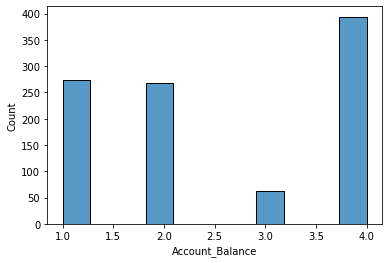

In [5]:
sns.histplot(X['Account_Balance'])

In [6]:
X['Account_Balance'].value_counts()

4    394
1    274
2    269
3     63
Name: Account_Balance, dtype: int64

In [7]:
# Transform to percentage
X['Account_Balance'].value_counts() / len(X) * 100

4    39.4
1    27.4
2    26.9
3     6.3
Name: Account_Balance, dtype: float64

In [8]:
'''
    Map Values: Account Balance
    
    1 > No Account
    2 > None
    3 > Below 200 DM
    4 > 200 DM or Above
'''

new_X = X.copy()

new_X = new_X.replace({'Account_Balance':{
    1 : 'No Account',
    2 : 'None',
    3 : 'Below 200 DM',
    4 : '200 DM or Above'
}})

In [9]:
new_X.head(10)

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,No Account,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,None,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,No Account,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,No Account,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
5,No Account,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
6,No Account,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
7,No Account,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
8,200 DM or Above,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
9,None,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


In [10]:
# Much more informative this way
new_X['Account_Balance'].value_counts() / len(new_X) * 100

200 DM or Above    39.4
No Account         27.4
None               26.9
Below 200 DM        6.3
Name: Account_Balance, dtype: float64

+ Payment_Status_of_Previous_Credit

In [11]:
new_X['Payment_Status_of_Previous_Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

In [12]:
'''
    Map Values: Payment_Status_of_Previous_Credit
    
    0 > Delayed
    1 > Other Credits
    2 > Paid Up
    3 > No Problem with Current Credits
    4 > Previous Credits Paid

'''

new_X = new_X.replace({'Payment_Status_of_Previous_Credit':{
    0 : 'Delayed',
    1 : 'Other Credits',
    2 : 'Paid Up',
    3 : 'No Problem with Current Credits',
    4 : 'Previous Credits Paid'
}})

new_X.head()

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,Previous Credits Paid,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,No Account,9,Previous Credits Paid,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,None,12,Paid Up,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,No Account,12,Previous Credits Paid,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,No Account,12,Previous Credits Paid,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [13]:
new_X['Payment_Status_of_Previous_Credit'].value_counts()

Paid Up                            530
Previous Credits Paid              293
No Problem with Current Credits     88
Other Credits                       49
Delayed                             40
Name: Payment_Status_of_Previous_Credit, dtype: int64

Mapping the values manually is not very efficient

Custom function to do the heavy lifting

In [14]:
# Key: Value pair of items to map
values_map = {
    'Purpose' : {
        0:'Other',
        1 : 'New Car', 
        2 : 'Used Car',
        3 : 'Furniture',
        4 : 'Radio/TV',
        5 : 'Appliances',
        6 : 'Repair', 
        8 :'Vacation', 
        9 : 'Retraining', 
        10 : 'Business'
    },
    'Value_Savings_Stocks': {
        1 : 'None',
        2 : 'Below 100 DM',
        3 : '[100, 500)',
        4 : '[500, 1000)',
        5 : 'Above 1000'
    },
    'Length_of_current_employment' : {
        1 : 'Unemployed', 
        2 : '<1 Year',
        3 : '[1, 4)',
        4 : '[4, 7)',
        5 : 'Above 7'
    },
    'Instalment_per_cent' : {
        1 : 'Above 35%', 
        2 : '(25%, 35%)',
        3 : '[20%, 25%)',
        4 : 'Below 20%'
    },
    'Occupation' : {
        1 : 'Unemployed, Unskilled',
        2 : 'Unskilled Permanent Resident',
        3 : 'Skilled',
        4 : 'Executive'
    },
    'Sex_Marital_Status' : {
        1 : 'Male, Divorced', 
        2 : 'Male, Single',
        3 : 'Male, Married/Widowed',
        4 : 'Female'
    },
    'Duration_in_Current_address' : {
        1 : '<1 Year', 
        2 : '[1, 4)',
        3 : '[4, 7)', 
        4 : 'Above 7'
    },
    'Type_of_apartment' : {
        1 : 'Free', 
        2 : 'Rented',
        3 : 'Owned'
    },
    'Most_valuable_available_asset' : {
        1 : 'None', 
        2 : 'Car',
        3 : 'Life Insurance',
        4 : 'Real Estate'
    },
    'No_of_Credits_at_this_Bank' : {
        1 : '1', 
        2 : '2 or 3',
        3 : '4 or 5',
        4 : 'Above 6'
    },
    'Guarantors' : {
        1 : 'None', 
        2 : 'Co-applicant',
        3 : 'Guarantor'
    },
    'Concurrent_Credits' : { 
        1 : 'Other Banks', 
        2 : 'Dept. Store',
        3 : 'None'
    },
    'No_of_dependents' : {
        1 : '3 or More', 
        2 : 'Less than 3'
    },
    'Telephone' : {
        1 : 'No', 
        2 : 'Yes'
    },
    'Foreign_Worker' : {
        1 : 'No', 
        2 : 'Yes'
    }
}

In [15]:
values_map.keys()

dict_keys(['Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Occupation', 'Sex_Marital_Status', 'Duration_in_Current_address', 'Type_of_apartment', 'Most_valuable_available_asset', 'No_of_Credits_at_this_Bank', 'Guarantors', 'Concurrent_Credits', 'No_of_dependents', 'Telephone', 'Foreign_Worker'])

In [16]:
values_map['Instalment_per_cent'].items()

dict_items([(1, 'Above 35%'), (2, '(25%, 35%)'), (3, '[20%, 25%)'), (4, 'Below 20%')])

In [17]:
values_map['Instalment_per_cent'].keys()

dict_keys([1, 2, 3, 4])

In [18]:
values_map['Instalment_per_cent'].values()

dict_values(['Above 35%', '(25%, 35%)', '[20%, 25%)', 'Below 20%'])

In [19]:
def trial_one(df, col):
    the_keys = values_map[col].keys()
    the_values = values_map[col].values()
    
    items = values_map[col].items()
    
    return the_keys, the_values, items

In [20]:
trial_one(new_X, 'Instalment_per_cent')

(dict_keys([1, 2, 3, 4]),
 dict_values(['Above 35%', '(25%, 35%)', '[20%, 25%)', 'Below 20%']),
 dict_items([(1, 'Above 35%'), (2, '(25%, 35%)'), (3, '[20%, 25%)'), (4, 'Below 20%')]))

In [21]:
new_X.head()

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,Previous Credits Paid,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,No Account,9,Previous Credits Paid,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,None,12,Paid Up,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,No Account,12,Previous Credits Paid,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,No Account,12,Previous Credits Paid,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [22]:
def map_values(df, values_map):
    
    cols = values_map.keys()
    
    for col in cols:
        print('---------------')
        print(col)
        for k, v in values_map[col].items():
            print(f'{k} > {v}')
            df = df.replace({col : {k : v}})
        
    return df.head(7)

In [23]:
map_values(new_X, values_map)

---------------
Purpose
0 > Other
1 > New Car
2 > Used Car
3 > Furniture
4 > Radio/TV
5 > Appliances
6 > Repair
8 > Vacation
9 > Retraining
10 > Business
---------------
Value_Savings_Stocks
1 > None
2 > Below 100 DM
3 > [100, 500)
4 > [500, 1000)
5 > Above 1000
---------------
Length_of_current_employment
1 > Unemployed
2 > <1 Year
3 > [1, 4)
4 > [4, 7)
5 > Above 7
---------------
Instalment_per_cent
1 > Above 35%
2 > (25%, 35%)
3 > [20%, 25%)
4 > Below 20%
---------------
Occupation
1 > Unemployed, Unskilled
2 > Unskilled Permanent Resident
3 > Skilled
4 > Executive
---------------
Sex_Marital_Status
1 > Male, Divorced
2 > Male, Single
3 > Male, Married/Widowed
4 > Female
---------------
Duration_in_Current_address
1 > <1 Year
2 > [1, 4)
3 > [4, 7)
4 > Above 7
---------------
Type_of_apartment
1 > Free
2 > Rented
3 > Owned
---------------
Most_valuable_available_asset
1 > None
2 > Car
3 > Life Insurance
4 > Real Estate
---------------
No_of_Credits_at_this_Bank
1 > 1
2 > 2 or 3
3 > 4

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,Previous Credits Paid,Used Car,1049,None,<1 Year,Below 20%,"Male, Single",None,Above 7,Car,21,None,Free,1,Skilled,3 or More,No,No
1,No Account,9,Previous Credits Paid,Other,2799,None,"[1, 4)","(25%, 35%)","Male, Married/Widowed",None,"[1, 4)",None,36,None,Free,2 or 3,Skilled,Less than 3,No,No
2,None,12,Paid Up,Retraining,841,Below 100 DM,"[4, 7)","(25%, 35%)","Male, Single",None,Above 7,None,23,None,Free,1,Unskilled Permanent Resident,3 or More,No,No
3,No Account,12,Previous Credits Paid,Other,2122,None,"[1, 4)","[20%, 25%)","Male, Married/Widowed",None,"[1, 4)",None,39,None,Free,2 or 3,Unskilled Permanent Resident,Less than 3,No,Yes
4,No Account,12,Previous Credits Paid,Other,2171,None,"[1, 4)",Below 20%,"Male, Married/Widowed",None,Above 7,Car,38,Other Banks,Rented,2 or 3,Unskilled Permanent Resident,3 or More,No,Yes
5,No Account,10,Previous Credits Paid,Other,2241,None,<1 Year,Above 35%,"Male, Married/Widowed",None,"[4, 7)",None,48,None,Free,2 or 3,Unskilled Permanent Resident,Less than 3,No,Yes
6,No Account,8,Previous Credits Paid,Other,3398,None,"[4, 7)",Above 35%,"Male, Married/Widowed",None,Above 7,None,39,None,Rented,2 or 3,Unskilled Permanent Resident,3 or More,No,Yes


## Predictive Modelling

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

### RandomForest

In [88]:
model_rf = RandomForestClassifier(random_state = 11, n_estimators = 400)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=11)

In [89]:
preds_rf = model_rf.predict(X_valid)

auc_rf = metrics.roc_auc_score(preds_rf, y_valid)
print(f'AUC score: {auc_score}')

AUC score: 0.7202797202797202


In [90]:
acc_rf = metrics.accuracy_score(preds_rf, y_valid)
print(f'Accuracy : {acc_rf}')

Accuracy : 0.78


Hyperparameter Tuning
+ N_estimators
+ Max_depth
+ ...

### GradientBoosting

In [92]:
model_xgb = XGBClassifier(learning_rate = 0.1, use_label_encoder = False, max_depth = 4, gamma = 0.001)
model_xgb.fit(X_train, y_train, 
              eval_set = [(X_valid, y_valid)],
              early_stopping_rounds = 20
             )

[23:31:39] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.66157
[1]	validation_0-logloss:0.63757
[2]	validation_0-logloss:0.61646
[3]	validation_0-logloss:0.59701
[4]	validation_0-logloss:0.58305
[5]	validation_0-logloss:0.56950
[6]	validation_0-logloss:0.55807
[7]	validation_0-logloss:0.54510
[8]	validation_0-logloss:0.53672
[9]	validation_0-logloss:0.52883
[10]	validation_0-logloss:0.52283
[11]	validation_0-logloss:0.51680
[12]	validation_0-logloss:0.51180
[13]	validation_0-logloss:0.50443
[14]	validation_0-logloss:0.50156
[15]	validation_0-logloss:0.49827
[16]	validation_0-logloss:0.49363
[17]	validation_0-logloss:0.49122
[18]	validation_0-logloss:0.48633
[19]	validation_0-logloss:0.48489
[20]	validation_0-logloss:0.48395
[21]	validation_0-logloss:0.48338
[22]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [93]:
preds_xgb = model_xgb.predict(X_valid)

auc_xgb = metrics.roc_auc_score(preds_xgb, y_valid)
print(f'XGB AUC score: {auc_xgb}')

XGB AUC score: 0.7359855334538878


C:\Users\HP\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [94]:
acc_xgb = metrics.accuracy_score(preds_xgb, y_valid)
print(f'XGB Accuracy: {acc_xgb}')

XGB Accuracy: 0.79


Hyperparameter Tuning

+ Learning_rate
+ Max_depth
+ Gamma
+ ...